In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import operator

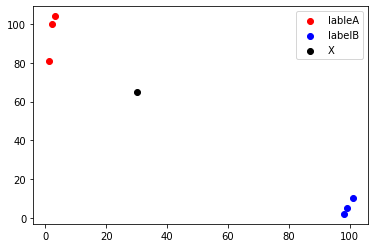

In [7]:
# 分类样本
x1 = np.array([3,2,1])
y1 = np.array([104, 100, 81])

x2 = np.array([101,99, 98])
y2 = np.array([10,5,2])

scatter1 = plt.scatter(x1, y1, c="r")
scatter2 = plt.scatter(x2, y2, c="b")

# unkonw sample
x = np.array([30])
y = np.array([65])
scatter3 = plt. scatter(x, y, c ="k")

# drawing lable
plt.legend(handles = [scatter1, scatter2, scatter3], labels=["lableA","labelB","X"], loc="best")
plt.show()

In [15]:
# konwn data 
x_data = np.array([[3,104],
                  [2,100],
                  [1,81],
                  [101,10],
                  [99,5],
                  [81,2]])
y_data = np .array(["A","A","A","B","B","B"])
x_test = np.array([30,65])

In [16]:
# calculate sample amount
x_data_size = x_data.shape[0]
x_data_size

6

In [17]:
# copy x_test  因为unkonw样本要和每个known样本进行计算 复制出来进行计算
np.tile(x_test, (x_data_size,1))# x_data 长度的x_test 数据 复制一份

array([[30, 65],
       [30, 65],
       [30, 65],
       [30, 65],
       [30, 65],
       [30, 65]])

In [32]:
# Euclidean distance :
# 1. different value
diffMat = np.tile(x_test, (x_data_size, 1)) - x_data
print("different=", diffMat)
print("--------")
# different sqrt
sqdiffMat = diffMat **2
print("different squart=", sqdiffMat)
# sum 
sq_distance = sqdiffMat.sum(axis=1)
print("sum=",sq_distance)
# root 
euc_dis = sq_distance**0.5
print("Euclidean_diatance=", euc_dis)

different= [[ 27 -39]
 [ 28 -35]
 [ 29 -16]
 [-71  55]
 [-69  60]
 [-51  63]]
--------
different squart= [[ 729 1521]
 [ 784 1225]
 [ 841  256]
 [5041 3025]
 [4761 3600]
 [2601 3969]]
sum= [2250 2009 1097 8066 8361 6570]
Euclidean_diatance= [47.4341649  44.82186966 33.12099032 89.81091248 91.43850392 81.05553652]


In [34]:
# sort euclidean distance 
sortedEuclidean = euc_dis.argsort() # 得出的大小数字的下标
print(sortedEuclidean)

[2 1 0 5 3 4]


In [39]:
# reset k value 
classCount = {}  # 字典 用于存放投票
k = 5
for i in range(k):
    # label 
    votelabel = y_data [sortedEuclidean[i]]
    # count label acount
    classCount[votelabel] = classCount.get(votelabel,0) + 1
classCount

{'A': 3, 'B': 2}

In [40]:
# 根据operator.itemgetter(1) 第一个值对classCount 排序
sortedclassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
sortedclassCount

[('A', 3), ('B', 2)]

In [41]:
# 获得最多的label 
knnclass = sortedclassCount[0][0]
knnclass

'A'